#PCA is dimensionality reduction technique
#feature extraction technique
#features need not to be same we can have combination of multiple features in a single feature feature
#convert n features to k when k<=n
#data compression/data visulization(reducing dimension to 2d or 3d in order to visulize dataset)3. Speed up computation
#pca is unsupervised(we never use y)
#it preserves the feature with maximum variaability
#if u have more spread on the feature that means that feature is more important



#we have to find the direction where we have maximum variance is there and drop the perpendicular direction feature 2d->1d
#find the vector in direction of maxm points and make it a unit vector(direction)
#once u find the unit vector u need to project all the xis on this vector
#projection xi=(vector.xi)/mangintude of the vector
xi(proj)=(u1(vector))^T.xi
to maximize variance minimize the mean
maximize(1/m(sigma(1 to m) ui^T.xi)
#or we can also see problem as minimizing the distance of points from the line in prependicular direction
#distance**2(pythagores thm)=xiT.xi-uiT.xi
min u1 sigma(1 to m) di^2




PCA summary
1. column standardise[accord to mean]
2. S=xT.x/m [covaraince matrix]
3. compute eigen values and eigenvectors
4. u1=v1 and u2=v2...
5. select top K eigen values
6. project xi on selected eigen vectors
#larger eigen vectors means having direction with maxm variance in that direction

In [1]:
#pca code
import pandas as pd   
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [7]:
X=boston['data']

In [10]:
X.shape

(506, 13)

In [14]:
mu=X.mean(axis=0)
#mean centring
X_=X-mu

finding covariance matrix


In [17]:
S=np.dot(X_.T, X_)#COVARIANCE MATRIX (N*N)
S.shape

(13, 13)

In [20]:
#GETTING EIGEN VALUES/EIGEN VECTORS
lambdas,vectors=np.linalg.eig(S)#this function computes eigen values/eigen vectors of a square array
#first eigen values and secondly eigen vectors that too in the column


In [22]:
lambdas.shape

(13,)

In [23]:
lambdas[:2]#top 2 eigen values

array([15599405.18671571,  3156416.68100505])

In [24]:
vectors.shape

(13, 13)

In [28]:
#next step to get top k
v=vectors[:,:2]# as eigen vectors are in columns

In [29]:
#projection part starts
X_.shape

(506, 13)

In [31]:
v.shape

(13, 2)

In [38]:
X_new=np.dot(X_,v)
X_new

array([[-119.81884272,   -5.56005586],
       [-168.89015548,   10.11620863],
       [-169.31170747,   14.0805323 ],
       ...,
       [-138.38716306,    0.9380922 ],
       [-137.50517338,    4.2518251 ],
       [-139.19033295,    1.00906423]])

In [35]:
#13 dimensions-> 2 dimensions done
#using sklearn
from sklearn.decomposition import PCA

In [36]:
pca=PCA(n_components=2)

In [37]:
pca.fit_transform(X)

array([[-119.81884272,   -5.56005586],
       [-168.89015548,   10.11620863],
       [-169.31170747,   14.0805323 ],
       ...,
       [-138.38716306,    0.9380922 ],
       [-137.50517338,    4.2518251 ],
       [-139.19033295,    1.00906423]])

In [39]:
pca.explained_variance_ratio_ #this helps to identify how many features we need to select

array([0.80582318, 0.16305197])

In [45]:
#contribution of each lambda in variance
total=sum(lambdas)
explained_var=np.round(lambdas/total,3)

In [47]:
commulative_var=np.cumsum(explained_var)

In [48]:
import matplotlib.pyplot as plt


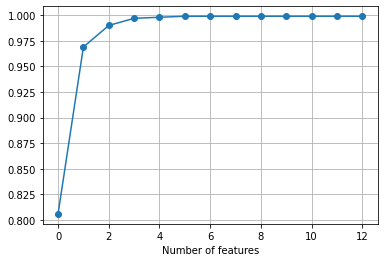

In [53]:
plt.plot(commulative_var,marker ="o")
plt.xlabel("Number of features")
plt.grid("on")